Receipt OCR Part 2 Text recognition by Tesseract

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

In [14]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

In [15]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

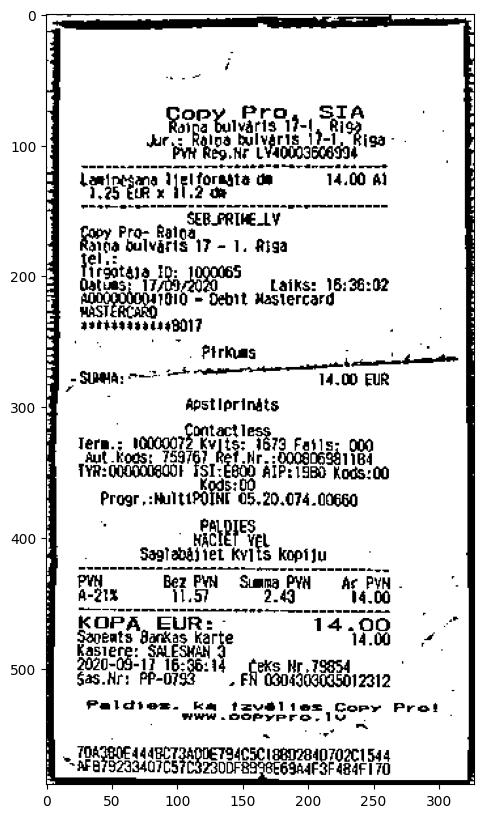

In [17]:
file_name = r"C:\Users\gilles\Documents\GitHub\OCR01\result.png"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

Step 1: Text box detection

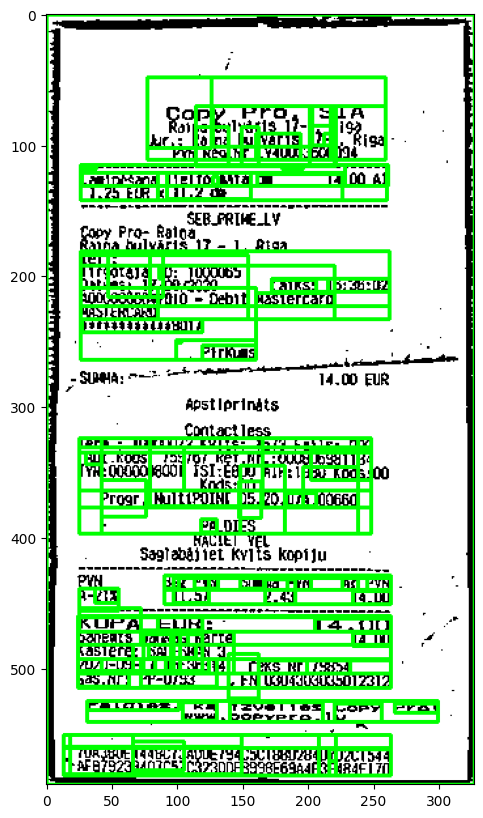

In [18]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

Step 2: Text recognition

In [19]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

ee Yanga io

919 ul aras Ud (34 Bl

iz x arr Ts)
Tosipigage east oe

atare |
Latks: 16:36:02
BECO cate

pared
SoransantoeB017
” Ptriags

Au
Tatoodanieddi Be
Progr, mi 06, Bo. 074. 1c

bay

Bez PYN Summa PY Ag PY
an Sea" Natt

angie

KOPA, EUR 14.900
Sreat barns aa 14.00
‘SAL ESM:

Rastere
0-08-17 16:96: T9854
Sescirs HP-ORSS" ef OSaNacoegIZa12

Paldion. ua tevelies Gory Prot

44807: sein 17
Sevarice arts




Step 3: Extracting grand total

In [20]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [21]:
amounts = find_amounts(extracted_text)
amounts

[14.0]

In [22]:
max(amounts)

14.0